<a href="https://www.kaggle.com/code/huiru11/car-uk?scriptVersionId=197483642" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [2]:
cclass = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv')
focus = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv')
ford = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv')
bmw = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv')
audi = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv')
hyundi = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv')
merc = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv')
skoda = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv')
toyota = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv')
vauxhall = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv')
vw = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv')

uncln_c = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv')
uncln_f = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv')


In [3]:
lst = [cclass,focus,ford,bmw,audi,hyundi, merc,skoda,toyota,vauxhall,vw, uncln_c, uncln_f]

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
for i in lst:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuelType      3899 non-null   object 
 6   engineSize    3899 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 213.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5454 non-null   object 
 1   year          5454 non-null   int64  
 2   price         5454 non-null   int64  
 3   transmission  5454 non-null   object 
 4   mileage       5454 non-null   int64  
 5   fuelType      5454 non-null   o

<Axes: >

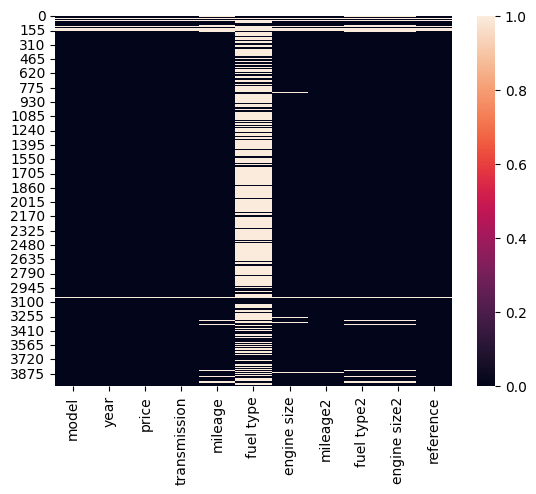

In [6]:

sns.heatmap(uncln_c.isnull())


<Axes: >

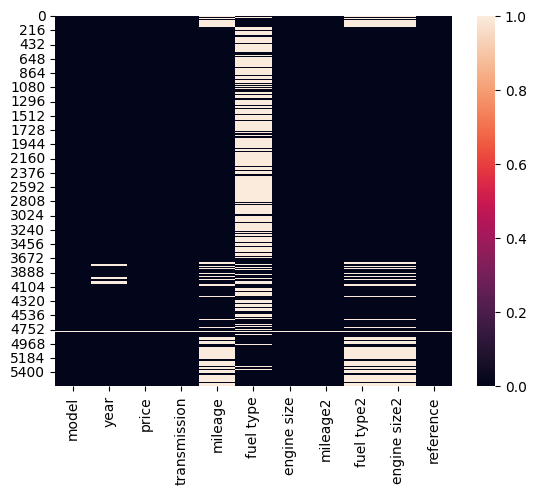

In [7]:
sns.heatmap(uncln_f.isnull())

# Clean the data (just for exo)

In [8]:
cls = ["price","mileage","engine size","mileage2","engine size2"]
for c in cls:
    uncln_c[c] = uncln_c[c].str.replace('£', '').str.replace(',', '')

In [9]:
uncln_c[cls] = uncln_c[cls].apply(pd.to_numeric, errors='coerce')


In [10]:
uncln_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   float64
 3   transmission  3907 non-null   object 
 4   mileage       3805 non-null   float64
 5   fuel type     1329 non-null   object 
 6   engine size   3841 non-null   float64
 7   mileage2      3889 non-null   float64
 8   fuel type2    3808 non-null   object 
 9   engine size2  3807 non-null   float64
 10  reference     3907 non-null   object 
dtypes: float64(6), object(5)
memory usage: 344.4+ KB


In [11]:

# Create a new column 'mileage' with the higher value from columns 'mileage' and 'mileage2'
# uncln_c['mileage'] = np.maximum(uncln_c['mileage'], uncln_c['mileage2'])
uncln_c['mileage'] = np.fmax(uncln_c['mileage'], uncln_c['mileage2'])

In [12]:
uncln_c['engine size'] = np.fmin(uncln_c['engine size'], uncln_c['engine size2'])
uncln_c['engine size'] = round(uncln_c['engine size'], 1)

In [13]:
uncln_c.loc[~uncln_c['fuel type'].isin(["Diesel", "Petrol", "Hybrid"]), 'fuel type'] = uncln_c['fuel type2']

In [14]:
uncln_c = uncln_c.drop(["mileage2","fuel type2", "engine size2", "reference"], axis=1)

In [15]:
uncln_c.isnull().sum()/len(uncln_c)

model           0.024713
year            0.025462
price           0.024713
transmission    0.024713
mileage         0.024963
fuel type       0.024713
engine size     0.024963
dtype: float64

In [16]:
uncln_c =  uncln_c.dropna()
uncln_c

,model,year,price,transmission,mileage,fuel type,engine size
0,C Class,2020.0,30495.0,Automatic,1200.0,Diesel,2.0
1,C Class,2020.0,29989.0,Automatic,1000.0,Petrol,1.5
2,C Class,2020.0,37899.0,Automatic,500.0,Diesel,2.0
3,C Class,2019.0,30399.0,Automatic,5000.0,Diesel,2.0
4,C Class,2019.0,29899.0,Automatic,4500.0,Diesel,2.0
...,...,...,...,...,...,...,...
4001,C Class,2017.0,14700.0,Manual,31357.0,Diesel,1.6
4002,C Class,2018.0,18500.0,Automatic,28248.0,Diesel,2.1
4003,C Class,2014.0,11900.0,Manual,48055.0,Diesel,2.1
4004,C Class,2014.0,11300.0,Automatic,49865.0,Diesel,2.1


# Intergrate the tables

In [17]:
hyundi= hyundi.rename(columns={'tax(£)': 'tax'})
hyundi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [18]:
df = [ford,bmw,audi,hyundi, merc,skoda,toyota,vauxhall,vw,cclass, focus]

# Concatenate DataFrames horizontally
dfs = pd.concat(df, axis=0)

In [19]:
dfs.isnull().sum()/len(dfs)

model           0.000000
year            0.000000
price           0.000000
transmission    0.000000
mileage         0.000000
fuelType        0.000000
tax             0.086171
mpg             0.086171
engineSize      0.000000
dtype: float64

In [20]:
# dfs['tax'] = dfs['tax'].fillna(dfs.tax.median())
# dfs['mpg'] = dfs['mpg'].fillna(dfs.mpg.median())
# dfs.tail()

In [21]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108540 entries, 0 to 5453
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 8.3+ MB


# EDA

In [22]:
def give_histplots(data:pd.DataFrame,cols:list,hue=None,
                   stat='count',common_norm=True, discrete=False):
    '''histplots of columns in 'cols' decomposed by 'hue'
        stat = 'count', 'percent', 'density' , ... --> see doc seaborn for histplot
        discrete =  each occurence is a bin --> see doc seaborn for histplot
        
        common_norm = if false: when decomposed by 'hue'
            => use groupby(hue) count as ref --> see doc seaborn histplot 
    '''
    N_cols = len(cols)
    DF = data[cols] if hue is None else data[[hue]+cols]
    
    
    fig = plt.figure(figsize=(10, 5*N_cols))
    
    for i,col in enumerate(cols):
        plt.subplot(N_cols,2,1+i)
        '''
        if hue is not None:
            plt.title(f'Countplot for {col} by hue = {hue}\n')
        else:
            plt.title(f'Countplot for {col}\n')
        ''' 
        sns.histplot(data=DF, x=col
                      , fill=True
                      #, element="step" #
                      , stat = stat#'count' # 'count','density','percent', ...
                      , discrete=discrete
                      , kde= not discrete
                      , common_norm=common_norm
                      , hue = hue
                     )

        
        plt.tight_layout()
    
    return fig
    

In [23]:
def give_countplots(data:pd.DataFrame,cols:list,hue=None):
    '''provide a picture of subgraphs of countplots
        for each column in 'cols'
        decomposed/grouped by 'hue'
    '''
    
    N_cols = len(cols)
    DF = data[cols] if hue is None else data[[hue]+cols]
    
    
    fig = plt.figure(figsize=(10, 5*N_cols))
    
    for i,col in enumerate(cols):
        plt.subplot(N_cols,1,1+i)
        '''
        if hue is not None:
            plt.title(f'Countplot for {col} by hue = {hue}\n')
        else:
            plt.title(f'Countplot for {col}\n')
        ''' 
        ax = sns.countplot(data=DF, x=col, hue=hue) 

        N_tot = DF[col].count()

        ### show the data-labels for each bar
        for container in ax.containers:
            ## https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars
            ##labels = [f'{h/data[target].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in container]


            labels = [] 
            for vbar in container:
                h = vbar.get_height()

                ## add % and count
                str_ = f'{h/N_tot*100:0.1f}% , {int(h)}' if h>0 else ''
                labels.append(str_)

            ax.bar_label(container, labels=labels, label_type='edge')
        plt.xticks(rotation=90)
        plt.tight_layout()
    
    return fig


## target analysis

In [24]:
target = 'price'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

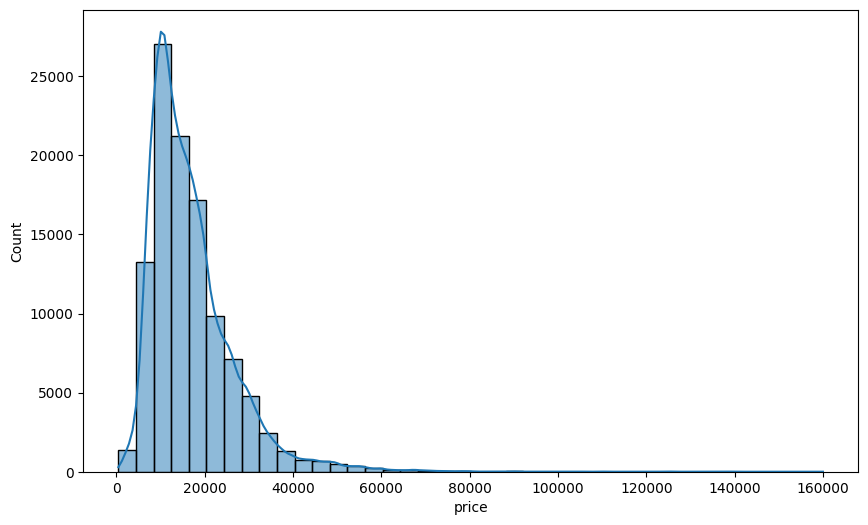

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(dfs['price'], bins=40, kde=True)

## feature analysis

In [26]:
features = dfs.drop(['price'], axis = 1)

In [27]:
features.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [28]:
features.describe(include = "all")

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
count,108540,108540.000000,108540,108540.000000,108540,99187.000000,99187.000000,108540.000000
unique,195,NaN,4,NaN,5,NaN,NaN,NaN
top,Focus,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,10042,NaN,61308,NaN,59875,NaN,NaN,NaN
mean,NaN,2017.098028,NaN,23025.928469,NaN,120.299838,55.166825,1.661644
std,NaN,2.130057,NaN,21176.423684,NaN,63.150926,16.138522,0.557058
min,NaN,1970.000000,NaN,1.000000,NaN,0.000000,0.300000,0.000000
25%,NaN,2016.000000,NaN,7491.750000,NaN,125.000000,47.100000,1.200000
50%,NaN,2017.000000,NaN,17265.000000,NaN,145.000000,54.300000,1.600000
75%,NaN,2019.000000,NaN,32236.000000,NaN,145.000000,62.800000,2.000000


In [29]:
num_cls = features.columns[features.dtypes != 'object']
cat_cls = features.columns[features.dtypes == 'object']
print(num_cls)
print(cat_cls)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Index(['model', 'transmission', 'fuelType'], dtype='object')


## Numerical features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

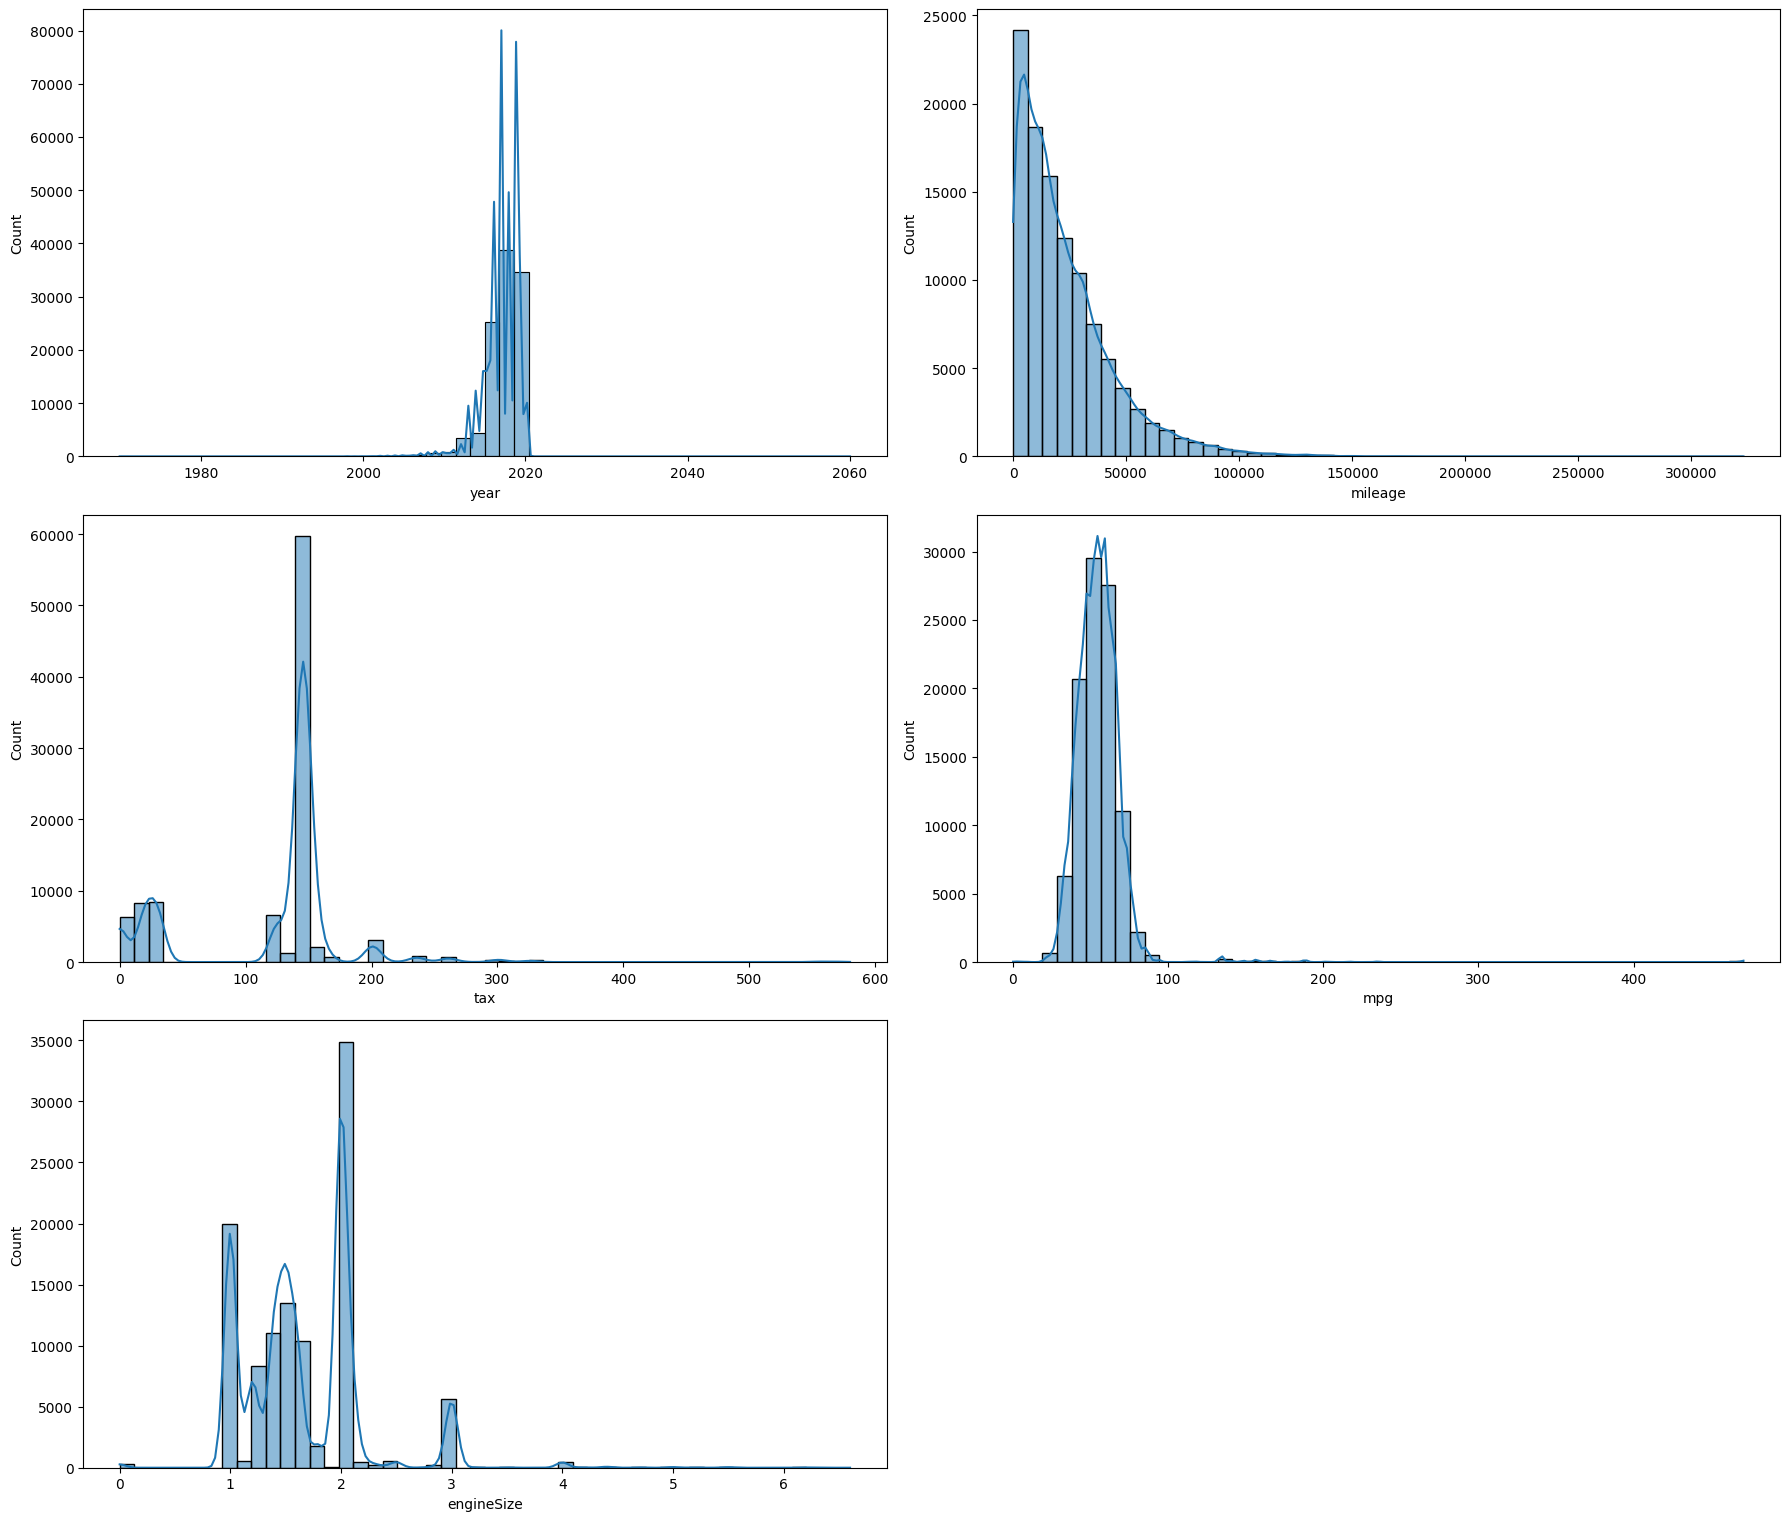

In [30]:
N = len(num_cls)
  
fig = plt.figure(figsize=(18, 5*N ))
    
for i,col in enumerate(num_cls):
    plt.subplot(N,2,1+i)
        
    sns.histplot(features[col],bins=50 , kde = True)
       
    plt.tight_layout()

In [31]:
dfs.loc[dfs['year'] == 2060, 'year'] = 2006

In [32]:
dfs.loc[dfs['year']<2000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13544,Fiesta,1998,2699,Manual,37000,Petrol,160.0,41.5,1.2
16878,Escort,1996,3000,Manual,50000,Petrol,265.0,34.4,1.8
9555,Z3,1999,3995,Manual,74282,Petrol,245.0,35.3,1.9
9560,Z3,1999,3995,Manual,51949,Petrol,255.0,35.3,1.9
9625,5 Series,1996,5995,Automatic,36000,Petrol,270.0,26.4,2.8
9744,3 Series,1999,1200,Automatic,82000,Petrol,245.0,31.0,2.8
9841,Z3,1997,3950,Manual,49000,Petrol,270.0,35.3,1.9
9842,Z3,1998,3950,Manual,56500,Petrol,270.0,35.3,1.9
9938,Z3,1999,3950,Manual,58000,Petrol,270.0,35.3,1.9
9788,A3,1998,4999,Automatic,55000,Petrol,265.0,30.4,1.8


## Category features

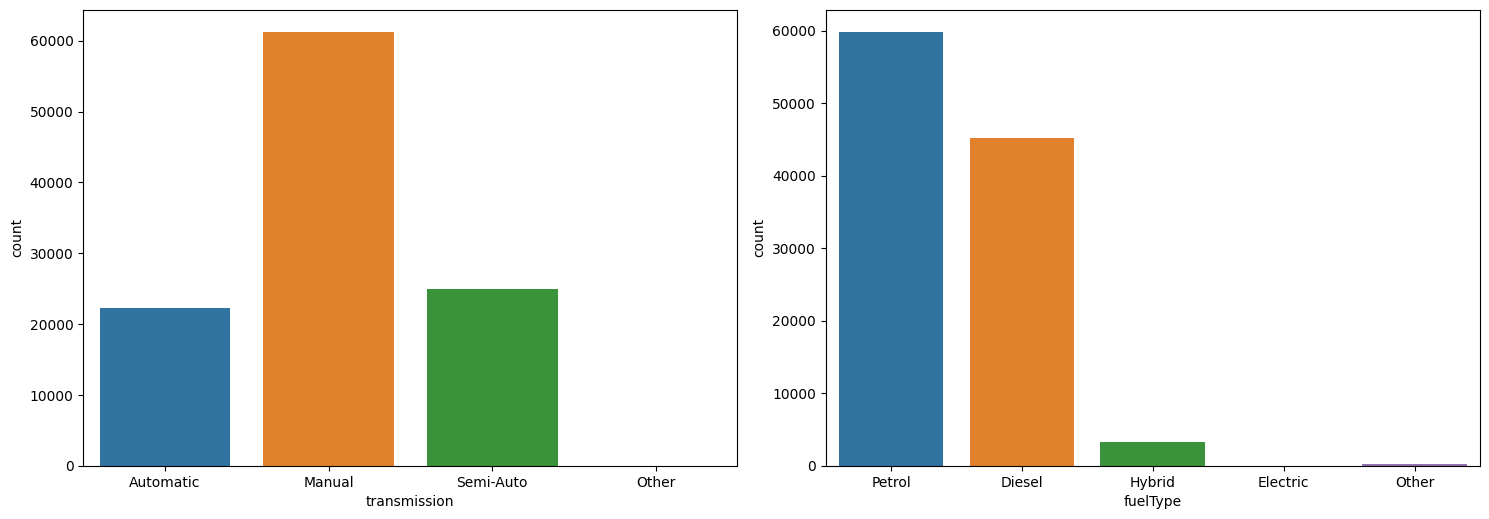

In [33]:
NC = len(["transmission", "fuelType"])
  
fig = plt.figure(figsize=(15, 5 * NC))
    
for i, col in enumerate(["transmission", "fuelType"]):
    plt.subplot(NC, 2, 1 + i)
        
    sns.countplot(data=dfs, x=col)
        
plt.tight_layout()
plt.show()

## Categorical VS target

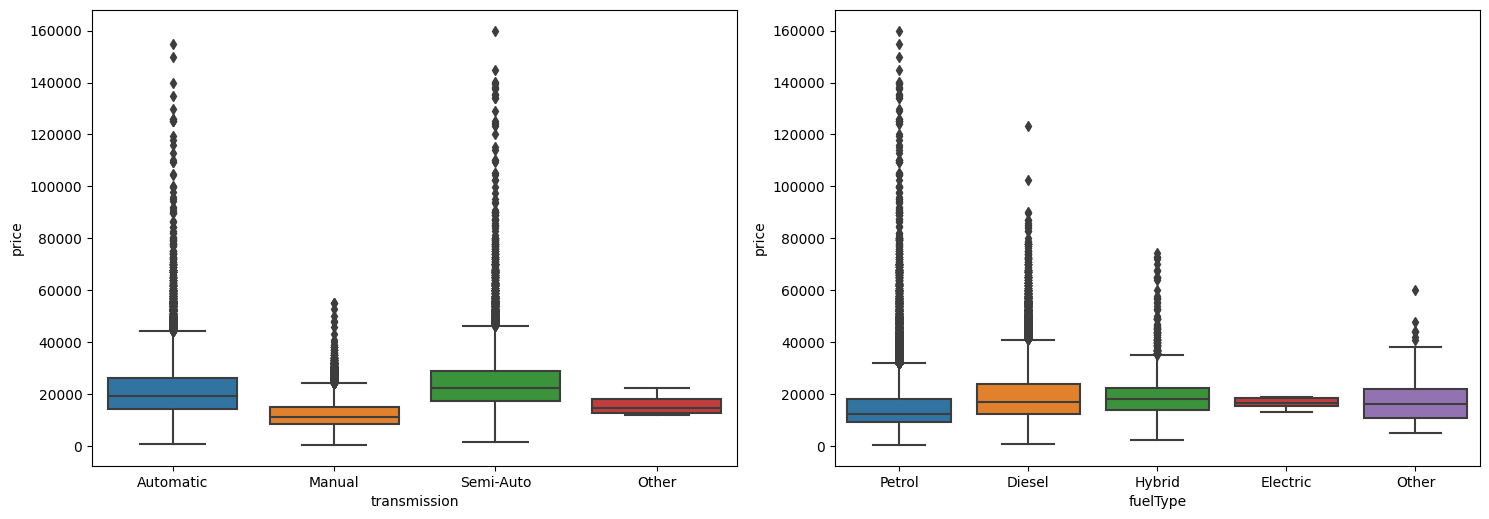

In [34]:
NC = len(["transmission", "fuelType"])
  
fig = plt.figure(figsize=(15, 5 * NC))
    
for i, col in enumerate(["transmission", "fuelType"]):
    plt.subplot(NC, 2, 1 + i)
        
    sns.boxplot(data=dfs, x=col, y='price')
        
plt.tight_layout()
plt.show()

In [35]:
features.model.unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', ' 5 Series', ' 6 Series',
       ' 1 Series', ' 7 Series', ' 2 Series', ' 4 Series', ' X3',
       ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4', ' X2', ' X6',
       ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2', ' M3', ' M6',
       ' Z3', ' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4',
       ' Q2', ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4',
       ' RS5', ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
       ' I20', ' Tucson', ' I10', ' IX35', ' I30', ' I40', ' Ioniq',
       ' Kona', ' Veloster', ' I800', ' IX20', ' Santa Fe', ' Accent',
       ' Terracan', ' Getz', ' Amica', ' SLK', ' S Class', ' SL CLASS',
       ' G Class', 

## Keep only the reasonable(price) car

In [36]:
h = dfs.loc[dfs.price>80000]
h.model.unique()


array([' 8 Series', ' M4', ' 2 Series', ' M5', ' Q7', ' Q8', ' R8',
       ' RS6', ' I10', ' SL CLASS', ' G Class', ' A Class', ' S Class',
       ' GLE Class', ' C Class', ' Karoq'], dtype=object)

In [37]:
car = dfs.loc[dfs.price <=50000, :]

In [38]:
car.model.nunique()

192

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

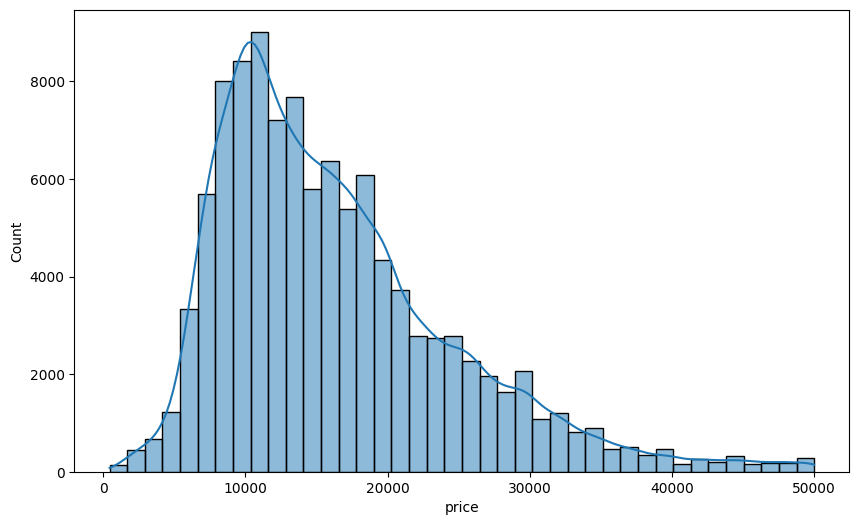

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(car['price'], bins=40, kde=True)

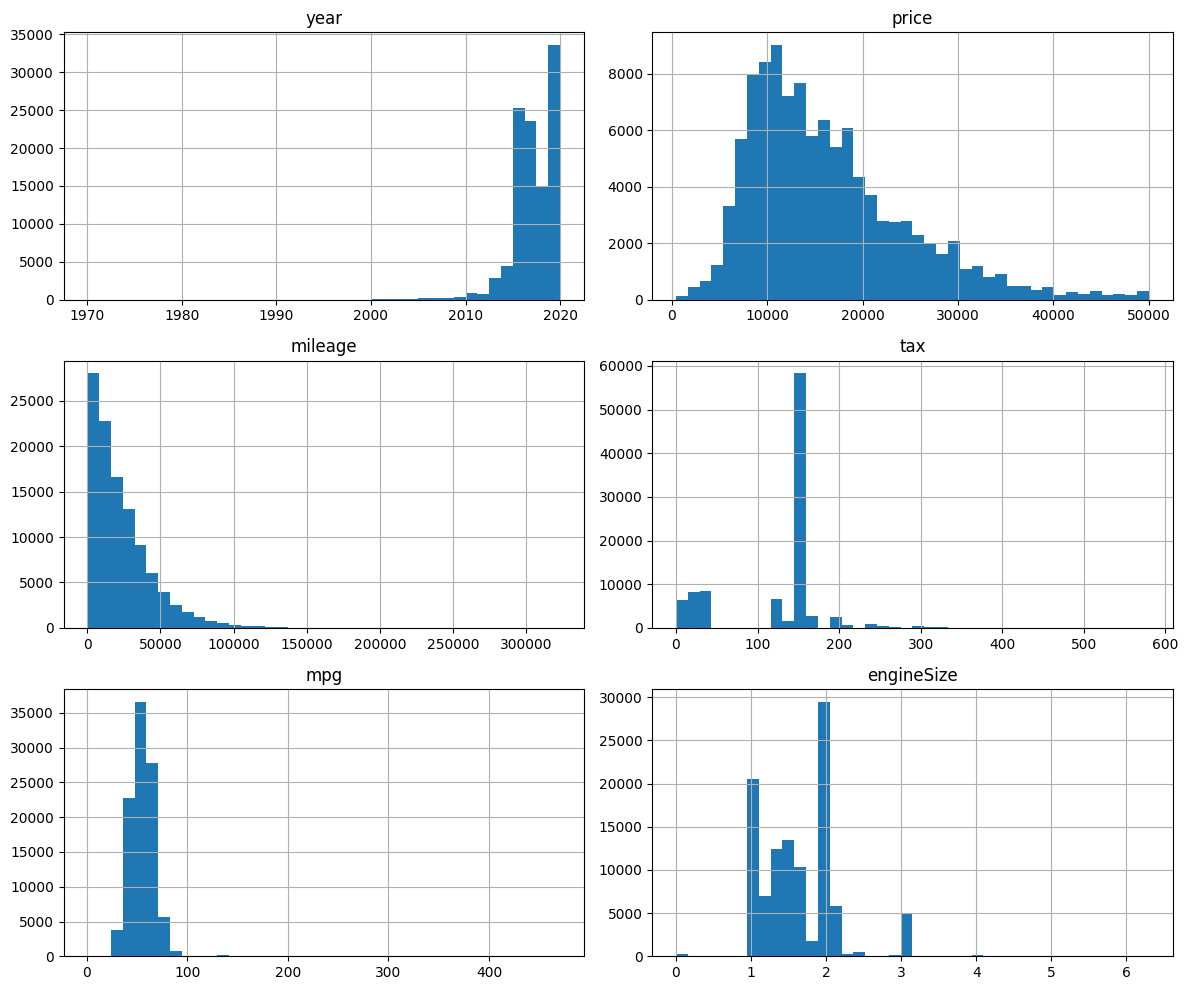

In [40]:
car.hist(figsize=(12, 10), bins=40)
plt.tight_layout()
plt.show()

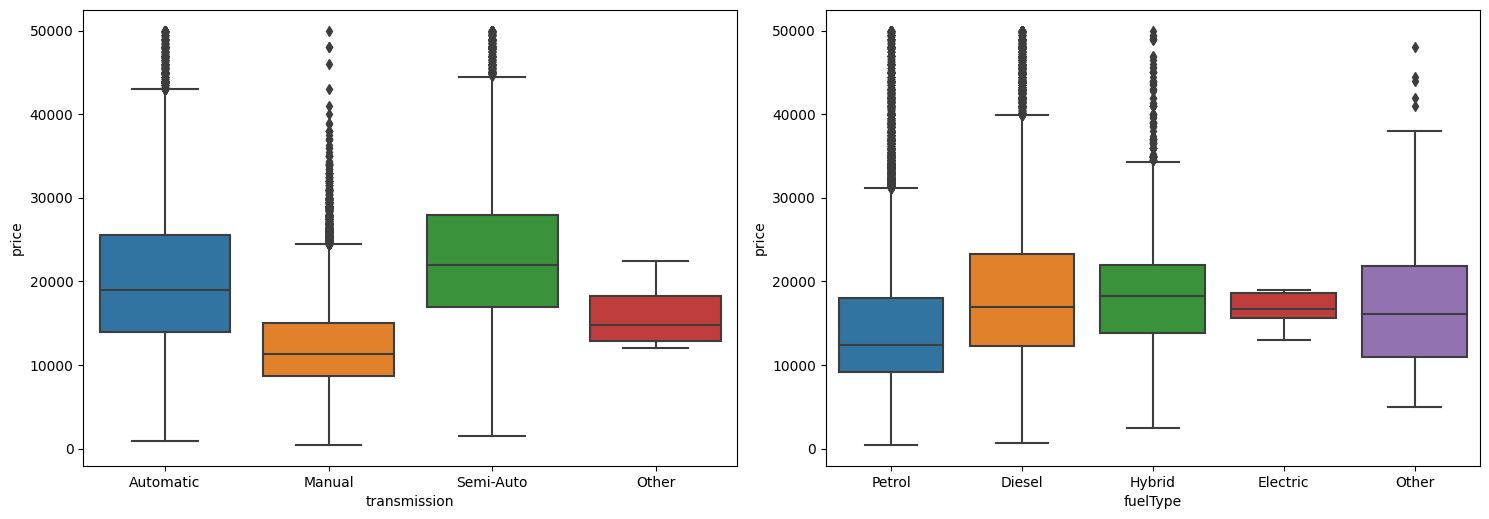

In [41]:
NC = len(["transmission", "fuelType"])
  
fig = plt.figure(figsize=(15, 5 * NC))
    
for i, col in enumerate(["transmission", "fuelType"]):
    plt.subplot(NC, 2, 1 + i)
        
    sns.boxplot(data=car, x=col, y='price')
        
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

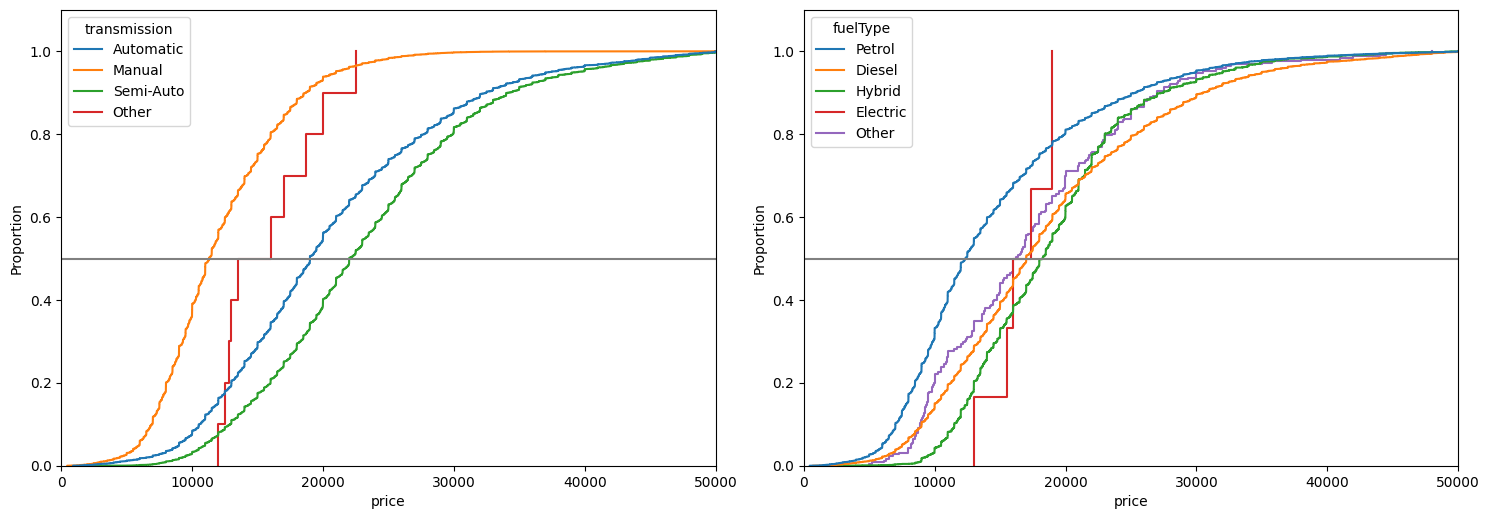

In [42]:
NC = len(["transmission", "fuelType"])
  
fig = plt.figure(figsize=(15, 5 * NC))

for i,col in enumerate(["transmission", "fuelType"]):

    plt.subplot(NC,2,1+i)
    ### ecdf = empirical cumulated density function
    sns.ecdfplot(car, x= 'price', hue=col)
    plt.hlines(0.5,xmin=0,xmax = car['price'].max(), color='grey')
    plt.axis([0,car['price'].max(),0,1.1])
plt.tight_layout()
plt.show()

## Numerical VS target

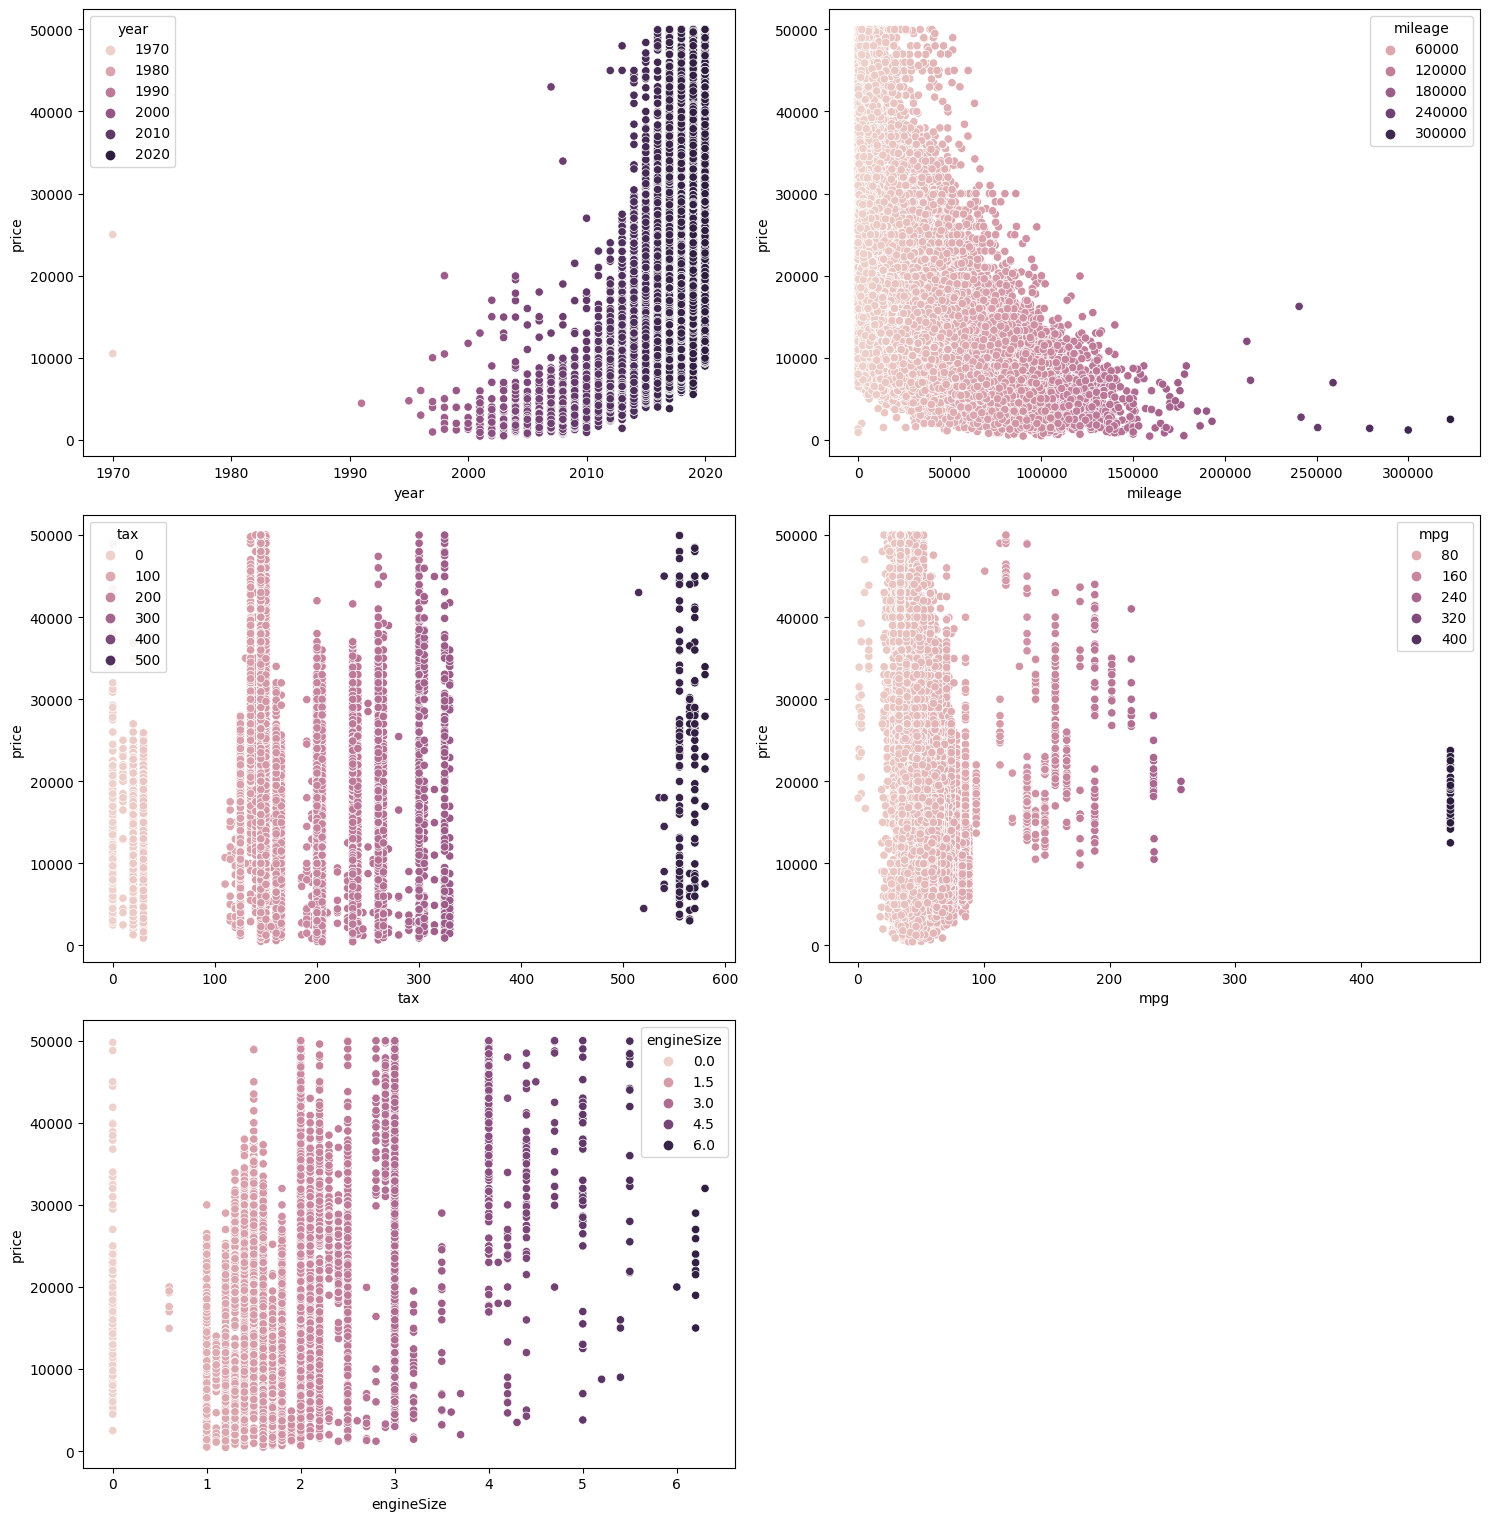

In [43]:
N = len(num_cls)

plt.figure(figsize=(15,5*N))
for i,col in enumerate(num_cls):

    plt.subplot(N,2,1+i)
    sns.scatterplot(car, y= 'price', x=col, hue=col)

plt.tight_layout()
plt.show()

## feature engineering for car models

In [44]:
# Provided list of car models
car_models = car['model'].unique()

# Extracting car brand
def get_brand(model):
    if model in ['Fiesta', 'Focus', 'Puma', 'Kuga', 'EcoSport', 'C-MAX', 'Mondeo', 'Ka+', 'Tourneo Custom', 'S-MAX', 
                 'B-MAX', 'Edge', 'Tourneo Connect', 'Grand C-MAX', 'KA', 'Galaxy', 'Mustang', 'Grand Tourneo Connect',
                 'Fusion', 'Ranger', 'Streetka', 'Escort', 'Transit Tourneo']:
        return 'Ford'
    elif model in ['5 Series', '6 Series', '1 Series', '7 Series', '2 Series', '4 Series', 'X3', '3 Series', 'X5', 
                   'X4', 'i3', 'X1', 'M4', 'X2', 'X6', '8 Series', 'Z4', 'X7', 'M5', 'i8', 'M2', 'M3', 'M6', 'Z3']:
        return 'BMW'
    elif model in ['A1', 'A6', 'A4', 'A3', 'Q3', 'Q5', 'A5', 'S4', 'Q2', 'A7', 'TT', 'Q7', 'RS6', 'RS3', 'A8', 'Q8', 
                   'RS4', 'RS5', 'R8', 'SQ5', 'S8', 'SQ7', 'S3', 'S5', 'A2', 'RS7']:
        return 'Audi'
    elif model in ['I20', 'Tucson', 'I10', 'IX35', 'I30', 'I40', 'Ioniq', 'Kona', 'Veloster', 'I800', 'IX20', 'Santa Fe', 
                   'Accent', 'Terracan', 'Getz', 'Amica']:
        return 'Hyundai'
    elif model in ['SLK', 'S Class', 'SL CLASS', 'G Class', 'GLE Class', 'GLA Class', 'A Class', 'B Class', 'GLC Class', 
                   'C Class', 'E Class', 'GL Class', 'CLS Class', 'CLC Class', 'CLA Class', 'V Class', 'M Class', 
                   'CL Class', 'GLS Class', 'GLB Class', 'X-CLASS', '180', 'CLK', 'R Class', '230', '220', '200']:
        return 'Mercedes-Benz'
    elif model in ['Octavia', 'Citigo', 'Yeti Outdoor', 'Superb', 'Kodiaq', 'Rapid', 'Karoq', 'Fabia', 'Yeti', 'Scala', 
                   'Roomster', 'Kamiq']:
        return 'Skoda'
    elif model in ['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR', 'Prius', 'Avensis', 'Verso', 'Hilux', 
                   'PROACE VERSO', 'Land Cruiser', 'Supra', 'Camry', 'Verso-S', 'IQ', 'Urban Cruiser']:
        return 'Toyota'
    elif model in ['Corsa', 'Astra', 'Viva', 'Mokka', 'Mokka X', 'Crossland X', 'Zafira', 'Meriva', 'Zafira Tourer', 'Adam', 
                   'Grandland X', 'Antara', 'Insignia', 'Ampera', 'GTC', 'Combo Life', 'Vivaro', 'Cascada', 'Kadjar', 'Agila', 
                   'Tigra', 'Vectra']:
        return 'Vauxhall/Opel'
    elif model in ['T-Roc', 'Golf', 'Passat', 'T-Cross', 'Polo', 'Tiguan', 'Sharan', 'Up', 'Scirocco', 'Beetle', 'Caddy Maxi Life',
                   'Caravelle', 'Touareg', 'Arteon', 'Touran', 'Golf SV', 'Amarok', 'Tiguan Allspace', 'Shuttle', 'Jetta', 'CC', 
                   'California', 'Caddy Life', 'Caddy', 'Caddy Maxi', 'Eos', 'Fox']:
        return 'Volkswagen'
    else:
        return 'Other'

# Car type classification
def get_car_type(model):
    suvs = ['Kuga', 'EcoSport', 'Edge', 'X5', 'X6', 'Q5', 'Q7', 'Tucson', 'Santa Fe', 'RAV4', 'Land Cruiser', 'Hilux', 
            'Grandland X', 'Tiguan', 'Touareg', 'Kodiaq', 'Karoq', 'Kamiq']
    hatchbacks = ['Fiesta', 'Focus', 'Puma', 'A1', 'A3', 'I20', 'I30', 'Polo', 'Golf', 'Yaris', 'Fabia', 'Corsa', 'Astra']
    sedans = ['Mondeo', 'Fusion', '5 Series', '3 Series', 'A4', 'A6', 'C Class', 'E Class', 'Octavia', 'Superb', 'Corolla', 
              'Camry', 'Insignia', 'Passat', 'Arteon']
    performance = ['Mustang', 'M4', 'M2', 'M3', 'M6', 'RS6', 'RS3', 'RS4', 'RS5', 'RS7', 'R8', 'GT86', 'Supra', 'Golf R', 'Scirocco R']
    coupes = ['Z4', 'Z3', 'TT', 'SLK', 'CLK', 'Cascada', 'Eos', 'Beetle']
    vans = ['Tourneo Custom', 'Transit Tourneo', 'Vivaro', 'Caddy', 'Caddy Maxi', 'Shuttle']
    
    if model in suvs:
        return 'SUV'
    elif model in hatchbacks:
        return 'Hatchback'
    elif model in sedans:
        return 'Sedan'
    elif model in performance:
        return 'Performance'
    elif model in coupes:
        return 'Coupe'
    elif model in vans:
        return 'Van'
    else:
        return 'Other'

# High-performance flag
def is_high_performance(model):
    if model in ['M4', 'M5', 'M2', 'M3', 'M6', 'RS6', 'RS3', 'RS4', 'RS5', 'RS7', 'R8', 'GT86', 'Supra',
                ' 8 Series', ' X7', ' X5', ' i8', ' X6', ' 2 Series',' X3', ' X4',' 3 Series', ' Q7', ' Q8', 
                 ' Q5', ' A8', ' I10', ' G Class', ' SL CLASS',' GLC Class', ' S Class', ' GLS Class', ' A Class', ' C Class',
                 ' GLE Class', ' E Class', ' CLS Class', ' Karoq', ' California'
                ]:
        return 1
    else:
        return 0


# model price > 80000
#[' 8 Series', ' M4', ' 2 Series', ' M5', ' Q7', ' Q8', ' R8', ' RS6', ' I10', ' SL CLASS', ' G Class', ' A Class', ' S Class',' GLE Class', ' C Class', ' Karoq']


In [45]:
car['model'] = car['model'].str.strip()
car['Brand'] = car['model'].apply(get_brand)
car['Car_Type'] = car['model'].apply(get_car_type)
car['High_Performance'] = car['model'].apply(is_high_performance)


/tmp/ipykernel_17/1957939850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['model'] = car['model'].str.strip()
/tmp/ipykernel_17/1957939850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Brand'] = car['model'].apply(get_brand)
/tmp/ipykernel_17/1957939850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [46]:
car.head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Brand,Car_Type,High_Performance
0,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0,Ford,Hatchback,0
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0,Ford,Hatchback,0
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,Ford,Hatchback,0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5,Ford,Hatchback,0
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0,Ford,Hatchback,0
5,Fiesta,2015,10500,Manual,35432,Petrol,145.0,47.9,1.6,Ford,Hatchback,0
6,Puma,2019,22500,Manual,2029,Petrol,145.0,50.4,1.0,Ford,Hatchback,0
7,Fiesta,2017,9000,Manual,13054,Petrol,145.0,54.3,1.2,Ford,Hatchback,0
8,Kuga,2019,25500,Automatic,6894,Diesel,145.0,42.2,2.0,Ford,SUV,0
9,Focus,2018,10000,Manual,48141,Petrol,145.0,61.4,1.0,Ford,Hatchback,0


## New Columns EDA

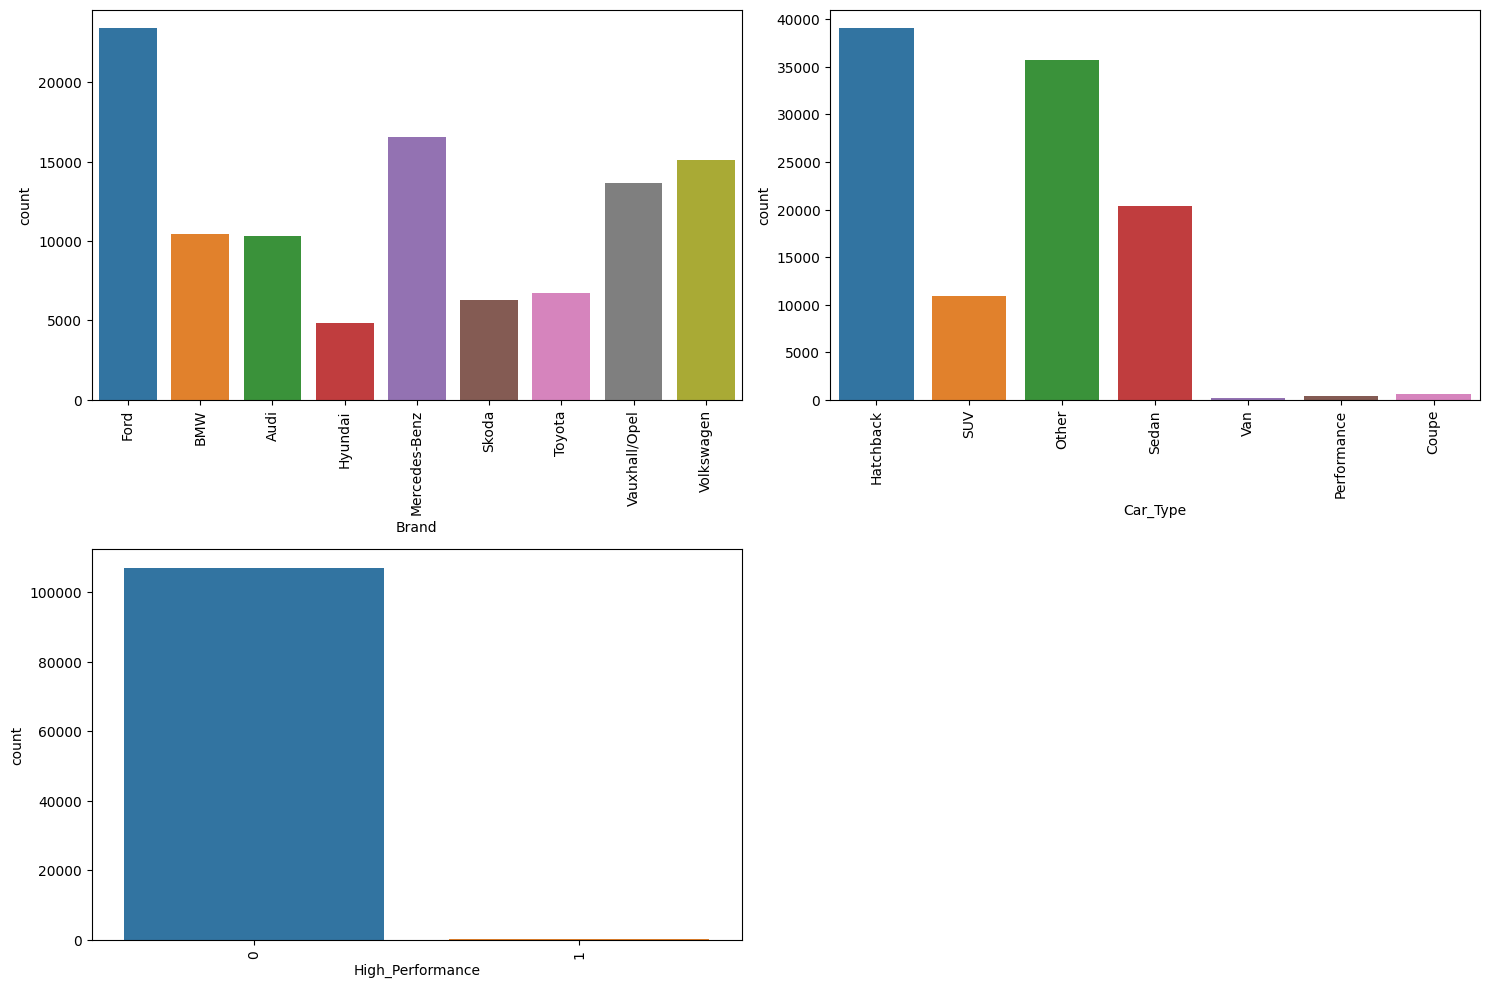

In [47]:
NC = len(["Brand", "Car_Type", "High_Performance"])
  
fig = plt.figure(figsize=(15, 5 * NC))
    
for i, col in enumerate(["Brand", "Car_Type", "High_Performance"]):
    plt.subplot(NC, 2, 1 + i)
        
    sns.countplot(data=car, x=col)

    plt.xticks(rotation=90)
        
plt.tight_layout()
plt.show()

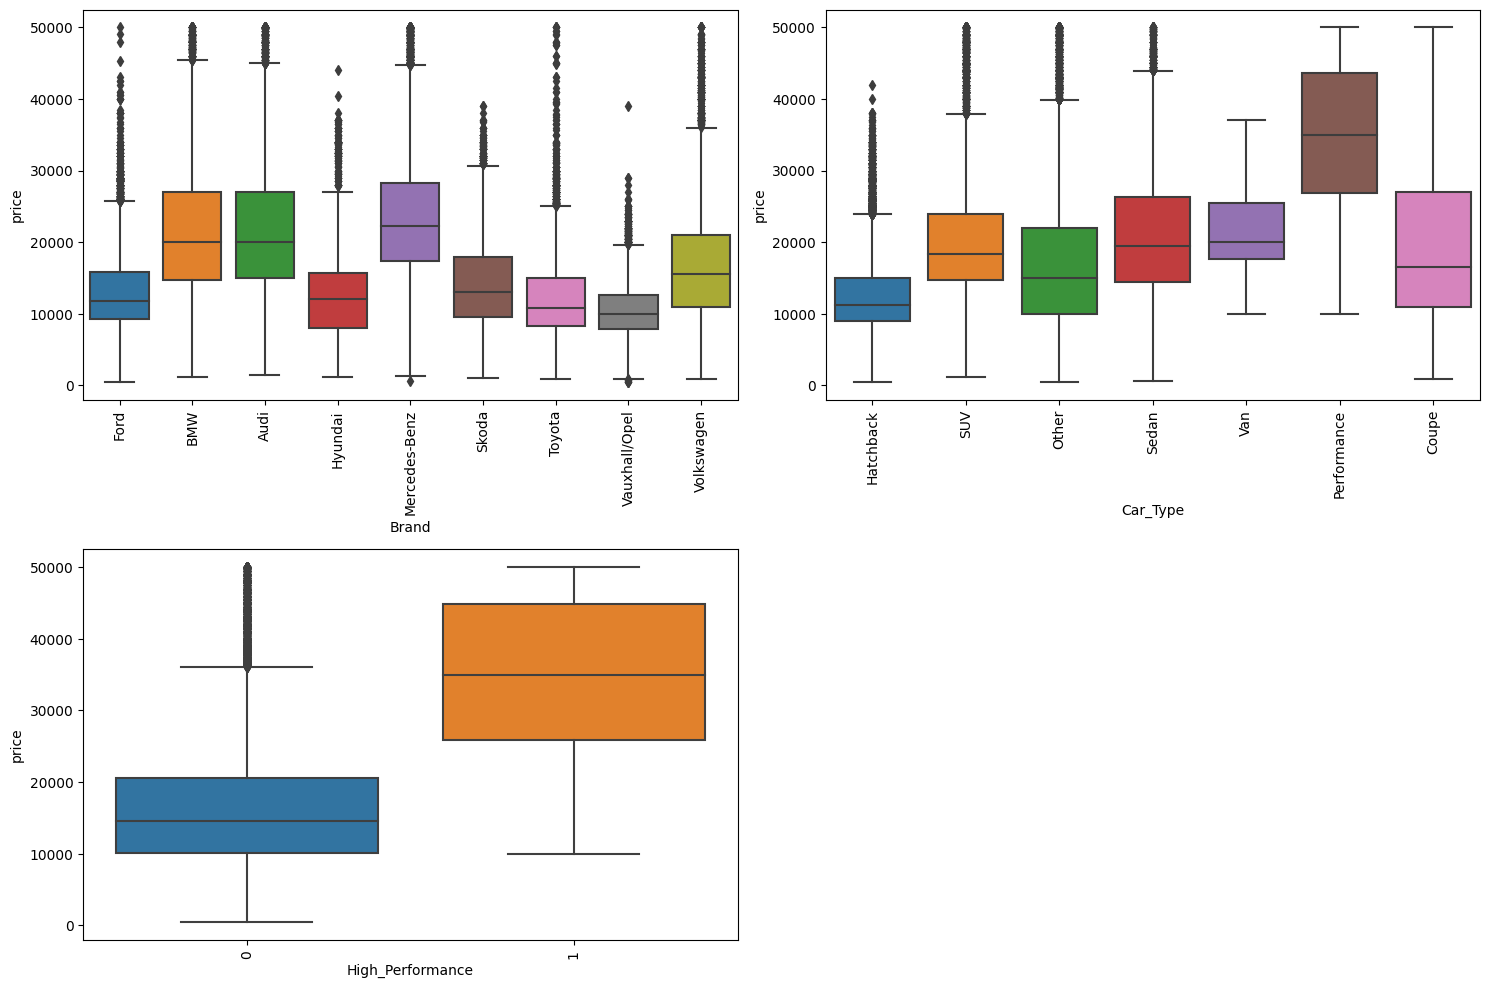

In [48]:
NC = len(["Brand", "Car_Type", "High_Performance"])
  
fig = plt.figure(figsize=(15, 5 * NC))
    
for i, col in enumerate(["Brand", "Car_Type", "High_Performance"]):
    plt.subplot(NC, 2, 1 + i)
        
    sns.boxplot(data=car, x=col, y='price')
    
    plt.xticks(rotation=90)
        
plt.tight_layout()
plt.show()

In [49]:
car = car.drop(['model'], axis=1)

## Imputer

In [50]:
from sklearn.impute import SimpleImputer

# Create SimpleImputer object with 'median' strategy
median_imputer = SimpleImputer(strategy='median')

# Apply SimpleImputer to 'tax' and 'mpg' columns
car['tax'] = median_imputer.fit_transform(car[['tax']])
car['mpg'] = median_imputer.fit_transform(car[['mpg']])

## Encoder

In [51]:
car.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453],
      dtype='int64', length=107343)

In [52]:
from sklearn.preprocessing import OneHotEncoder

# Selecting the categorical columns
c_cls = ["transmission", "fuelType", "Brand", "Car_Type"]

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(car[c_cls])

# Convert encoded features into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(c_cls))

# Reset index to align with the original DataFrame
encoded_df.index = car.index

# Concatenate the encoded columns with the original DataFrame (dropping the original categorical columns)
car_encoded = pd.concat([car.drop(columns=c_cls), encoded_df], axis=1)

# Check the result
print(car_encoded.head())


   year  price  mileage    tax   mpg  engineSize  High_Performance  \
0  2017  12000    15944  150.0  57.7         1.0                 0   
1  2018  14000     9083  150.0  57.7         1.0                 0   
2  2017  13000    12456  150.0  57.7         1.0                 0   
3  2019  17500    10460  145.0  40.3         1.5                 0   
4  2019  16500     1482  145.0  48.7         1.0                 0   

   transmission_Manual  transmission_Other  transmission_Semi-Auto  ...  \
0                  0.0                 0.0                     0.0  ...   
1                  1.0                 0.0                     0.0  ...   
2                  1.0                 0.0                     0.0  ...   
3                  1.0                 0.0                     0.0  ...   
4                  0.0                 0.0                     0.0  ...   

   Brand_Skoda  Brand_Toyota  Brand_Vauxhall/Opel  Brand_Volkswagen  \
0          0.0           0.0                  0.0        

## Correlation 

<Axes: >

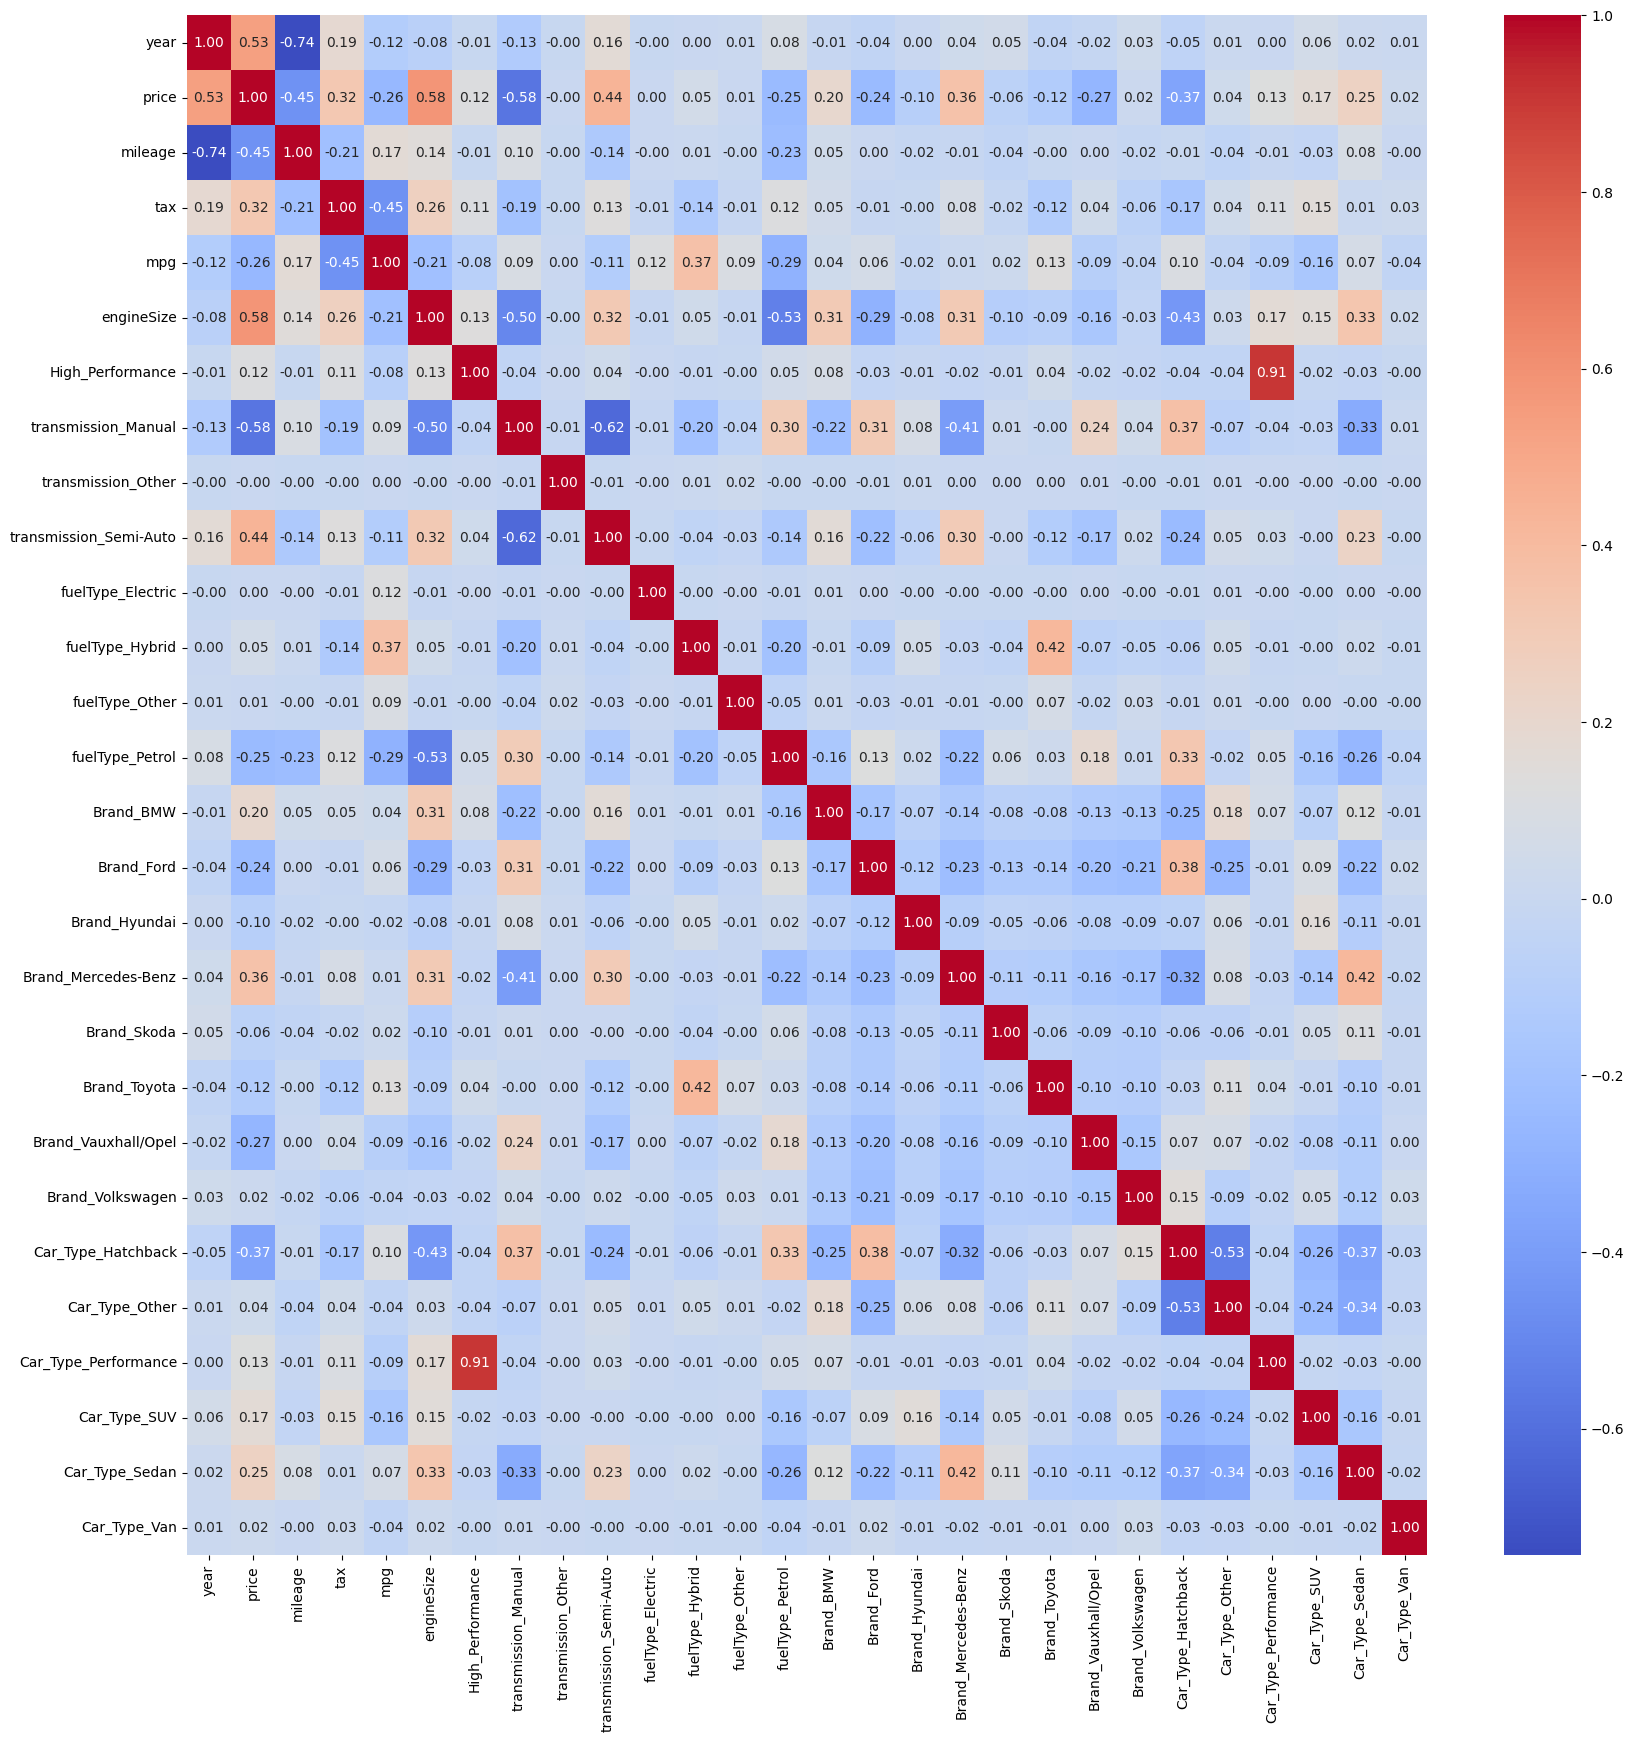

In [53]:
plt.figure(figsize=(20, 20))
sns.heatmap(car_encoded.corr(), annot = True, cmap="coolwarm", fmt='.2f')

In [54]:
#  Calculate the correlation matrix
corr_matrix = car_encoded.corr()

#  Set the threshold (e.g., 0.5) and filter out correlations lower than the threshold
threshold = 0.5

# Masking the diagonal (self-correlation of 1.0)
corr_matrix_no_diag = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Get pairs of features with correlation > 0.5
high_correlation_pairs = corr_matrix_no_diag.stack().reset_index()
high_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[ (high_correlation_pairs['Correlation'] > threshold) | 
    (high_correlation_pairs['Correlation'] < -threshold)]

# Output the feature pairs
print(high_correlation_pairs)


               Feature 1               Feature 2  Correlation
0                   year                   price     0.534827
1                   year                 mileage    -0.743362
30                 price              engineSize     0.582471
32                 price     transmission_Manual    -0.576793
126           engineSize     transmission_Manual    -0.502199
132           engineSize         fuelType_Petrol    -0.528460
164     High_Performance    Car_Type_Performance     0.909212
169  transmission_Manual  transmission_Semi-Auto    -0.622664
363   Car_Type_Hatchback          Car_Type_Other    -0.534843


In [55]:
print("Correlation with selling_price")
print(corr_matrix['price'].sort_values(ascending=False))

Correlation with selling_price
price                     1.000000
engineSize                0.582471
year                      0.534827
transmission_Semi-Auto    0.439944
Brand_Mercedes-Benz       0.355146
tax                       0.320466
Car_Type_Sedan            0.249898
Brand_BMW                 0.198361
Car_Type_SUV              0.169120
Car_Type_Performance      0.126679
High_Performance          0.116739
fuelType_Hybrid           0.054158
Car_Type_Other            0.039003
Car_Type_Van              0.021985
Brand_Volkswagen          0.017589
fuelType_Other            0.005559
fuelType_Electric         0.000240
transmission_Other       -0.000671
Brand_Skoda              -0.063072
Brand_Hyundai            -0.095062
Brand_Toyota             -0.121492
Brand_Ford               -0.240386
fuelType_Petrol          -0.245372
mpg                      -0.258911
Brand_Vauxhall/Opel      -0.273017
Car_Type_Hatchback       -0.368747
mileage                  -0.453556
transmission_Manual     

Text(0.5, 1.0, 'Feature Importance based on Correlation Matrix')

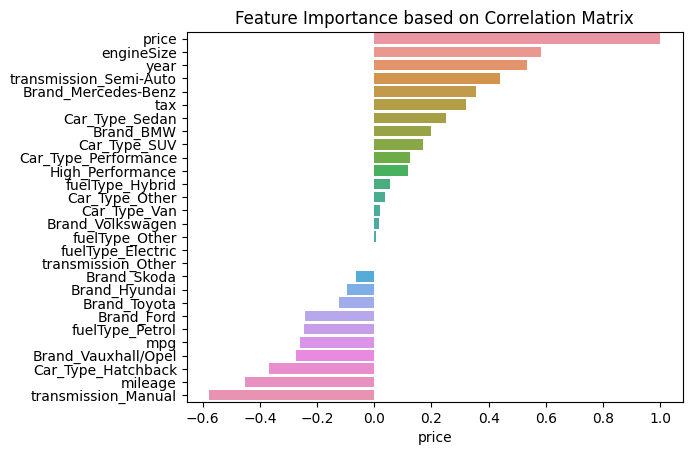

In [56]:
sns.barplot(x=corr_matrix['price'].sort_values(ascending=False), 
            y=corr_matrix['price'].sort_values(ascending=False).index)
plt.title('Feature Importance based on Correlation Matrix')

# Modeling

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [58]:
X = car_encoded.drop(['price'], axis = 1)
y = car_encoded['price']

In [59]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Train RandomForrestReg

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [61]:
rf.score(X_test, y_test)

0.952713838173224

In [62]:
# Decision Tree reg

from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=14).fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.9321303279056372

In [63]:
# Get features importances
from sklearn.feature_selection import RFE

importances = rf.feature_importances_

features_importances_df = pd.DataFrame({"Features": X.columns,"Importance": importances}).sort_values(by="Importance", ascending=False)


print("Random Forrest to determine feature importance")
features_importances_df

Random Forrest to determine feature importance


,Features,Importance
6,transmission_Manual,3.324863e-01
0,year,2.826719e-01
4,engineSize,1.899582e-01
3,mpg,6.000094e-02
1,mileage,5.393613e-02
16,Brand_Mercedes-Benz,1.197774e-02
19,Brand_Vauxhall/Opel,8.963558e-03
2,tax,8.428158e-03
22,Car_Type_Other,7.488607e-03
21,Car_Type_Hatchback,6.157040e-03


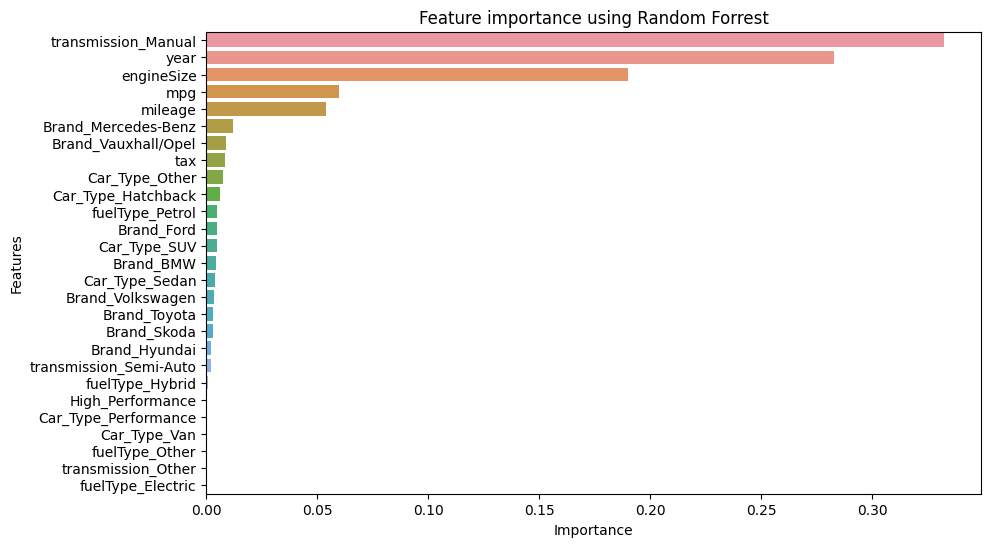

In [64]:
# Plot importances features

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y="Features", data=features_importances_df)
plt.title("Feature importance using Random Forrest")
plt.show()

In [65]:
#Instantiate lin model We 
from sklearn.preprocessing import PolynomialFeatures

X_train_poly = PolynomialFeatures(2).fit_transform(X_train)
X_test_poly = PolynomialFeatures(2).fit_transform(X_test)


poly_model = LinearRegression().fit(X_train_poly, y_train)

poly_model.score(X_test_poly, y_test)


0.8994886104817073

In [66]:
# LIn Reg

lr_model = LinearRegression().fit(X_train, y_train)

lr_model.score(X_test, y_test)

0.8125106428370474